# KL Divergence between Normal and BiModal Distribution

There was a post in RedNote claiming that in general when P is a bimodal distribution and Q is a normal distribution. KL(P||Q) is larger than KL(Q||P). However, I think such a "in general" may not hold, given in the case of KL(Q||P), when Q is the true distribution, fitting P to Q will cause a large divergence since most mass of Q is in the middle, Q(x) and log(Q(x)/P(x)) are both large when x is in the "central area of the support" (I know a relatively sloppy term, for standard normal distribution, just think x is around the 0), which may result in a larger divergence than the case of KL(P||Q) where we take a sum of two mode areas' density multiplied with the log ratio when P is true distribution. This notebook is trying to use discrete representations of continuous distributions to numerically investigate this.

In [2]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [22]:
from scipy.stats import entropy

In [47]:
from ipywidgets import interact, FloatSlider

In [23]:
def kl_divergence(dist1, dist2):
    # 1) choose common bin edges
    num_bins = 100
    mins = min(dist1.min(), dist2.min())
    maxs = max(dist1.max(), dist2.max())
    bins = np.linspace(mins, maxs, num_bins + 1)

    # 2) histogram (density=True → normalized to area=1)
    p_hist, _ = np.histogram(dist1, bins=bins, density=True)
    q_hist, _ = np.histogram(dist2, bins=bins, density=True)

    # 3) avoid zeros
    eps = 1e-10
    p_hist += eps
    q_hist += eps

    # 4) discrete KL
    kl_divergence = entropy(p_hist, q_hist)
    return kl_divergence

## Testing the kl_divergence function indeed works

From this blogpost, https://machinelearningmastery.com/divergence-between-probability-distributions/, there is a striaghforward calculation of KL Divergence where p is a discrete distribution with 3 possible values along with probs=[0.10, 0.40, 0.50] and q's prob is [0.80, 0.15, 0.05]. Ultimately KL(P||Q) = 1.336 and KL(Q||P) = 1.401 where natural log rather than base2 log is used, which is what scipy is doing with entropy function.

In [35]:
p = np.random.choice(3, size=100000, replace=True, p=[0.1, 0.4, 0.5])
q = np.random.choice(3, size=100000, replace=True, p=[0.8, 0.15, 0.05])

In [36]:
kl_divergence(p, q)

1.336339482427016

In [37]:
kl_divergence(q, p)

1.4017319899018523

## The Case of Two modes are very far

In [18]:
p = np.concatenate([np.random.normal(loc=-10, scale=1, size=5000), np.random.normal(loc=10, scale=1, size=5000)])
q = np.random.normal(loc=0, scale=1, size=10000)

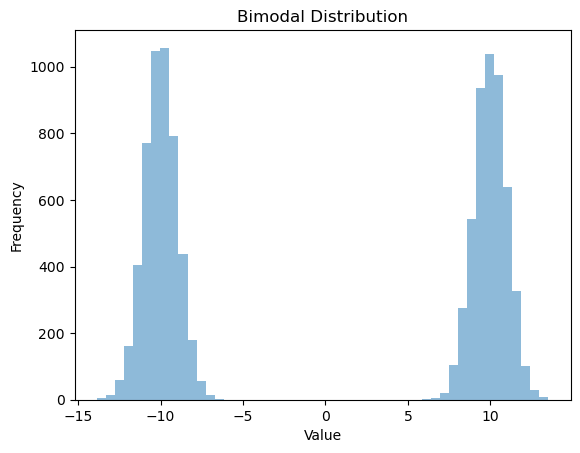

In [19]:
plt.hist(p, bins=50, alpha=0.5)
plt.title('Bimodal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

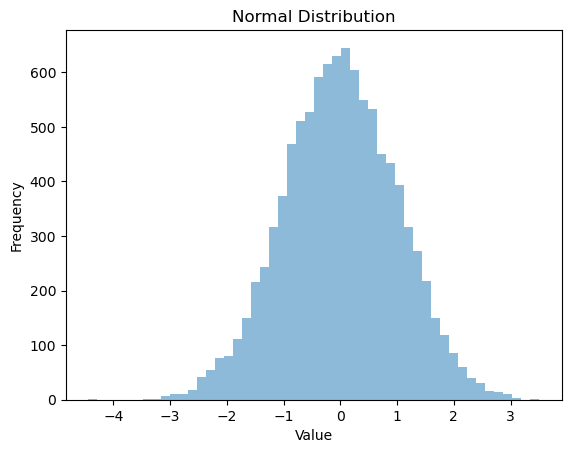

In [20]:
plt.hist(q, bins=50, alpha=0.5)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [24]:
kl_divergence(p, q)

20.91737822145958

In [25]:
kl_divergence(q, p)

21.60788849819788

## The case of two modes are close such that middle part has some overlaps

In [41]:
p = np.concatenate([np.random.normal(loc=-3, scale=1, size=5000), np.random.normal(loc=3, scale=1, size=5000)])
q = np.random.normal(loc=0, scale=1, size=10000)

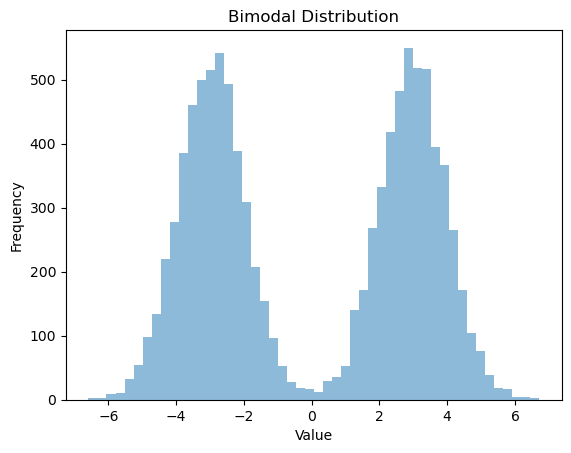

In [42]:
plt.hist(p, bins=50, alpha=0.5)
plt.title('Bimodal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

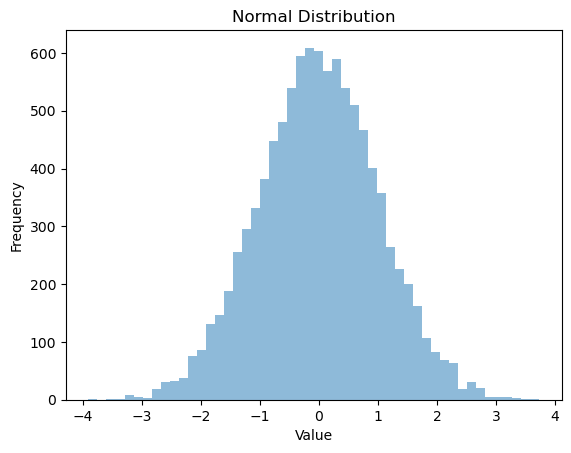

In [43]:
plt.hist(q, bins=50, alpha=0.5)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [45]:
kl_divergence(p, q)

7.11317989590379

In [46]:
kl_divergence(q, p)

2.662860226000326

## An interactive tool to show the dynamics
We fix the standard normal distribution as it is. But we change the position of the mode by manipulating a value bi_mode, where the bimodal distribution's modes are bi_mode and -bi_mode (symmetry around 0 to have the same mean/median as the standard normal distribution, but tbh we may not really need to control for mean or median to reach our conclusion, so symmetry perhaps is also more of a mental convenience). Then, one can see the relationship between KL divergence and how far two modes are (the closer two modes, more overlapping in the middle which causes the central area to be taller).

In [49]:
def plot_kl(bi_mode):
    p = np.concatenate([np.random.normal(loc=-1*bi_mode, scale=1, size=5000), np.random.normal(loc=bi_mode, scale=1, size=5000)])
    q = np.random.normal(loc=0, scale=1, size=10000)

    plt.hist(p, bins=50, alpha=0.5)
    plt.title(f"P with bi_mode at {bi_mode:.2f}, KL(P‖Q)={kl_divergence(p, q):.3f}, KL(Q‖P)={kl_divergence(q, p):.3f}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

interact(plot_kl, bi_mode=FloatSlider(min=0, max=20, step=0.1, value=1.0))

interactive(children=(FloatSlider(value=1.0, description='bi_mode', max=20.0), Output()), _dom_classes=('widge…

<function __main__.plot_kl(bi_mode)>

As we can see when two modes are far away from each other, where the central area of the bimodal distribution is not that high, such that the fitting binomial distribution won't be able to use its cenntral part to fit the big mass of normal distribution in the middle and therefore to decrease the overall divergence, KL(Q||P) can be larger. Now the question is whether the RedNote is wrong. That really comes down to how we define "in general", if in general bimodal distributions have modes close with each other, then the claim is correct. But that really depends on the data you work with or your worldview. I personally don't want to make such an assumption. The RedNote OP also claims that intuitively KL(P||Q) should be larger than KL(Q||P) given P the bimodal distribution is more complex therefore tends to be a better "fitter". Personally I don't like this claim. I think it's really just about the shape of the distribution and the math. Is a bimodal distribution with modes, that are far from each other, less ore more complex? I don't think it's fair to say that a bimodal distribution with modes that are far from each other is less complex and therefore results in a larger KL(Q||P) when fitting. Moreover, when modes are closer with each other, the bimodal distribution resembles more as the uni-modal normal distribution, and in our case when bi_mode=0, they are identically the same with KL(P||Q)=KL(Q||P)=0. In this case, the bimodal distribution is as complex as the normal distribution. Under the RedNote OP's world, once we increase the distance between two modes, the bimodal distribution, P, becomes more complex and fits better. But empirically we see, when distance between two modes is large enough, P fits worse, does that mean P now actually becomes less complex? I'm not sure if it's fair to say that the relationship between distance of two modes and complexity has such a non-linearity. Therefore, I don't like the complexity interpretation. A family of complex models may have better capacity to find a candidate that better fits, but that doesn't mean every complex model itself is a good fit; one can certainly be complex and bad.

Note: when bi_mode is very small, from the interactive graph, we also see a case where KL(Q||P) is larger than KL(P||Q). This can be due to empirical sampling. But it's also possible that KL(Q||P)-KL(P||Q) is not monotonically increasing such that by math KL(Q||P) can be larger when two modes are very close. That really requires one to use integral to directly work on pdf to reach a rigorous answer.